In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
#from tensorflow.keras.losses import CategoricalCrossentropy
#from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

wine = pd.read_csv(r"C:\Users\tkste\Downloads\winequality-red-properformat.csv")

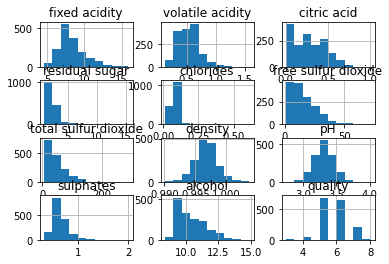

In [2]:
# to see more data cleaning/analysis look at Wine Quality file
wine.hist()
plt.show()

In [3]:
np.unique(wine['quality'])# see how many unique classes

array([3, 4, 5, 6, 7, 8], dtype=int64)

In [4]:
# logging two of the variables
wine_log = wine
wine_log['residual sugar_log'] = np.log(wine_log['residual sugar'])
wine_log['chlorides_log'] = np.log(wine_log['chlorides'])
#wine_log.describe()


# normalizing data
# we will not normalize the y variable since it is difficult to have data type float for a classification problem
X = wine_log.drop(columns = ['quality','residual sugar', 'chlorides']) # x variables
Y = wine_log['quality'] # y variable

X_norm = StandardScaler().fit_transform(X)
X_norm = pd.DataFrame(X_norm)
X_norm.columns = X.columns

In [5]:
# Splitting the data into training, validation, and test groups

X_train, X_test, y_train, y_test = train_test_split(X_norm, Y, test_size = 0.4, random_state = 42)
# To make the cross validation set, we will split this test set again
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

# Ensuring the split is 60%, 20%, 20%
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(Y), 2))

0.6
0.2
0.2


In [6]:
model = Sequential([ 
        Dense(100, activation = 'relu'),
        Dense(100, activation = 'relu'),
        Dense(100, activation = 'relu'),
        Dense(9, activation = 'softmax')
    ])

model.compile(
    loss=SparseCategoricalCrossentropy(),
    optimizer=Adam(0.001),
    metrics=SparseCategoricalAccuracy()
)

Model_history = model.fit(
    X_train,y_train,
    epochs=50,
    validation_data = (X_val,y_val))

Epoch 1/50
30/30 [==============================] - 1s 14ms/step - loss: 1.5431 - sparse_categorical_accuracy: 0.4891 - val_loss: 1.0955 - val_sparse_categorical_accuracy: 0.5719
Epoch 2/50
30/30 [==============================] - 0s 4ms/step - loss: 1.0796 - sparse_categorical_accuracy: 0.5944 - val_loss: 0.9773 - val_sparse_categorical_accuracy: 0.5625
Epoch 3/50
30/30 [==============================] - 0s 4ms/step - loss: 0.9950 - sparse_categorical_accuracy: 0.6194 - val_loss: 0.9464 - val_sparse_categorical_accuracy: 0.5625
Epoch 4/50
30/30 [==============================] - 0s 5ms/step - loss: 0.9551 - sparse_categorical_accuracy: 0.6194 - val_loss: 0.9323 - val_sparse_categorical_accuracy: 0.5781
Epoch 5/50
30/30 [==============================] - 0s 4ms/step - loss: 0.9230 - sparse_categorical_accuracy: 0.6361 - val_loss: 0.9334 - val_sparse_categorical_accuracy: 0.5906
Epoch 6/50
30/30 [==============================] - 0s 5ms/step - loss: 0.8948 - sparse_categorical_accuracy:

In [7]:
# Implementing regularization since we have overfitting

lambdas = [0.0, 0.0001, 0.001, 0.01]
models=[None] * len(lambdas)

for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(100, activation = 'relu', kernel_regularizer=l2(lambda_)),
            Dense(100, activation = 'relu', kernel_regularizer=l2(lambda_)),
            Dense(9, activation = 'softmax')
        ]
    )
    models[i].compile(
        loss=SparseCategoricalCrossentropy(),
        optimizer=Adam(0.01),
        metrics=SparseCategoricalAccuracy()
    )

    models[i].fit(
        X_train,y_train,
        epochs=50,
        validation_data = (X_val,y_val)
    )
    print(f"Finished lambda = {lambda_}")


Epoch 1/50
30/30 [==============================] - 1s 12ms/step - loss: 1.2195 - sparse_categorical_accuracy: 0.5401 - val_loss: 0.9999 - val_sparse_categorical_accuracy: 0.5594
Epoch 2/50
30/30 [==============================] - 0s 5ms/step - loss: 0.9802 - sparse_categorical_accuracy: 0.6340 - val_loss: 0.9702 - val_sparse_categorical_accuracy: 0.5781
Epoch 3/50
30/30 [==============================] - 0s 5ms/step - loss: 0.9247 - sparse_categorical_accuracy: 0.6277 - val_loss: 0.9930 - val_sparse_categorical_accuracy: 0.5813
Epoch 4/50
30/30 [==============================] - 0s 4ms/step - loss: 0.8934 - sparse_categorical_accuracy: 0.6330 - val_loss: 0.9342 - val_sparse_categorical_accuracy: 0.6281
Epoch 5/50
30/30 [==============================] - 0s 5ms/step - loss: 0.8724 - sparse_categorical_accuracy: 0.6444 - val_loss: 1.0336 - val_sparse_categorical_accuracy: 0.5719
Epoch 6/50
30/30 [==============================] - 0s 5ms/step - loss: 0.8434 - sparse_categorical_accuracy: